# Análise Exploratória com Dados de Vendas

- Utilização do dataset AdventureWorks.xlsx disponibilizado pela Microsoft

In [123]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [124]:
# Criando o DataFrame

df = pd.read_excel("AdventureWorks.xlsx")

In [125]:
# Vizualizando parte do DataFrame
pd.options.display.float_format = '{:20,.2f}'.format
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [126]:
# Quantidade de linhas e colunas
print(df.shape)

(904, 16)


### Tipos de dados

In [127]:

df.dtypes.reset_index()

,index,0
0,Data Venda,datetime64[ns]
1,Data Envio,datetime64[ns]
2,ID Loja,int64
3,ID Produto,int64
4,ID Cliente,int64
5,No. Venda,object
6,Custo Unitário,float64
7,Preço Unitário,float64
8,Quantidade,int64
9,Valor Desconto,float64


### Valorez Vazios

In [128]:

df.isnull().sum().reset_index()

,index,0
0,Data Venda,0
1,Data Envio,0
2,ID Loja,0
3,ID Produto,0
4,ID Cliente,0
5,No. Venda,0
6,Custo Unitário,0
7,Preço Unitário,0
8,Quantidade,0
9,Valor Desconto,0


In [129]:
# Criando coluna com dias da compra até o envio
df['Tempo Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,5


### Qual a receita total?

In [130]:
valor = df['Valor Venda'].sum()
print(f"Valor total de venda: R$ {valor:.2f}")

Valor total de venda: R$ 5984606.14


### Qual o custo total?

In [131]:
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])

custo = df['Custo'].sum()

print(f"Valor total de custo: R$ {custo:.2f}")

Valor total de custo: R$ 2486783.05


### Qual o lucro tota?

In [132]:
df['Lucro'] = df['Valor Venda'] - df['Custo']

lucro = df['Lucro'].sum()

print(f"Lucro total: R$ {lucro:.2f}")

Lucro total: R$ 3497823.09


### Qual a média de envio por Marca? (Em dias)

In [133]:
media_envio = df.groupby('Marca')['Tempo Envio'].mean()
media_envio.reset_index()

,Marca,Tempo Envio
0,Adventure Works,8.66
1,Contoso,8.47
2,Fabrikam,8.51


### Qual o Lucro por Ano e por Marca?

In [134]:
lucro_ano_marca = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()
lucro_ano_marca.reset_index()

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


### Qual o total de produtos vendidos? E quais vendem mais?

In [135]:
produtos = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
produtos.reset_index()

,Produto,Quantidade
0,Headphone Adapter for Contoso Phone E130 Silver,25232
1,Headphone Adapter for Contoso Phone E130 White,25008
2,Adventure Works Laptop15.4W M1548 Black,1089
3,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
4,Adventure Works Laptop15.4W M1548 Red,1047
5,Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
7,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
8,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789


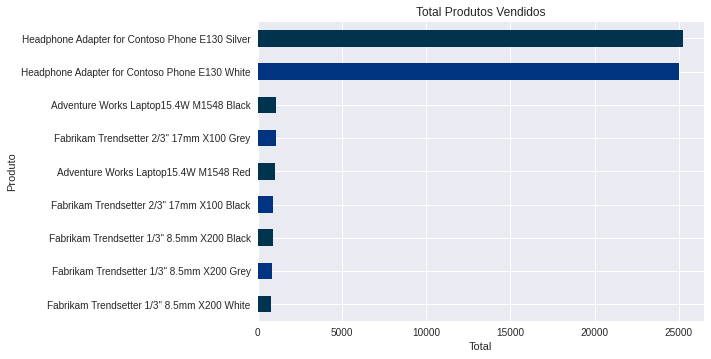

In [136]:
produtos.sort_values(ascending=True).plot.barh(title='Total Produtos Vendidos', color=[(0.0, .2, .3), (0.0, .2, .5)])
plt.xlabel('Total')
plt.ylabel('Produto');

### Qual o lucro anual?

In [137]:
lucro_anual = df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()
lucro_anual.reset_index()

,Data Venda,Lucro
0,2008,"1,920,077.71"
1,2009,"1,577,745.38"


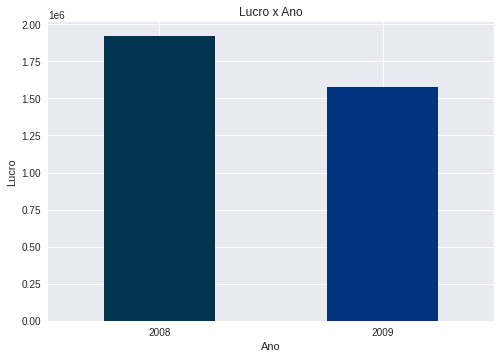

In [138]:
lucro_anual.plot.bar(title='Lucro x Ano', color=[(0.0, .2, .3), (0.0, .2, .5)])
plt.xlabel('Ano')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

### Vendas de 2009

In [139]:
df_2009 = df[df['Data Venda'].dt.year == 2009]
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Tempo Envio,Custo,Lucro
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,12,"2,091.48","2,456.52"
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,11,"2,091.48","2,456.52"
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,12,"2,091.48","2,456.52"
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,13,"2,091.48","2,456.52"
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,4,"2,091.48","2,456.52"


### Quais os lucros de cada mês de 2009?

In [140]:
lucro_mes = df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum()
lucro_mes.reset_index()

,Data Venda,Lucro
0,1,"130,719.04"
1,2,"179,228.92"
2,3,"147,538.25"
3,4,"66,354.39"
4,5,"90,540.00"
5,6,"200,310.41"
6,7,"227,134.51"
7,8,"46,756.42"
8,9,"83,952.62"
9,10,"130,678.05"


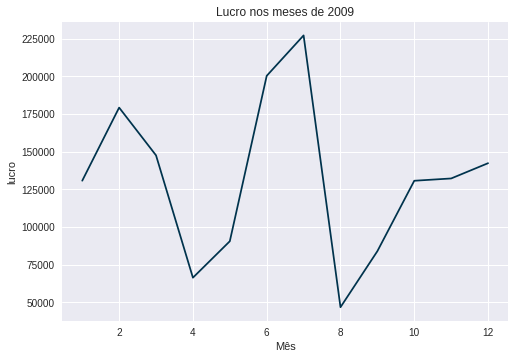

In [141]:
lucro_mes.plot(title='Lucro nos meses de 2009', color=[(0, 0.2, 0.3)])
plt.xlabel('Mês')
plt.ylabel('lucro');

### Qual o lucro por marca no ano de 2009?

In [142]:
lucro_marca = df_2009.groupby('Marca')['Lucro'].sum()
lucro_marca.reset_index()

,Marca,Lucro
0,Adventure Works,"405,395.08"
1,Contoso,"138,258.95"
2,Fabrikam,"1,034,091.35"


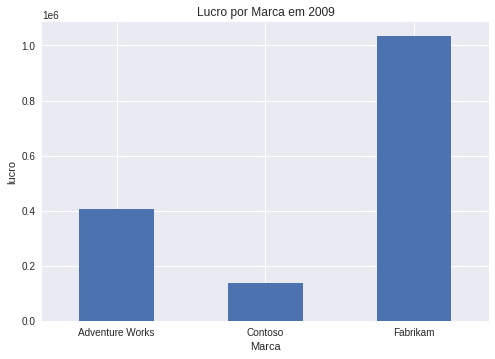

In [143]:
lucro_marca.plot.bar(title='Lucro por Marca em 2009')
plt.xlabel('Marca')
plt.ylabel('lucro')
plt.xticks(rotation='horizontal');

### Qual o lucro por classe em 2009?

In [144]:
lucro_classe = df_2009.groupby('Classe')['Lucro'].sum()
lucro_classe.reset_index()

,Classe,Lucro
0,Economy,"138,258.95"
1,Regular,"1,439,486.43"


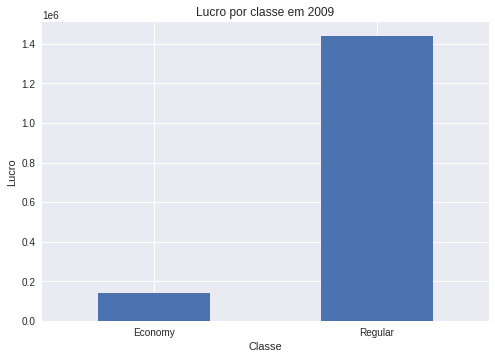

In [145]:
lucro_classe.plot.bar(title='Lucro por classe em 2009')
plt.xlabel('Classe')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

### Estatísticas do tempo de envio

In [146]:
df['Tempo Envio'].describe().reset_index()

,index,Tempo Envio
0,count,904.00
1,mean,8.54
2,std,3.06
3,min,4.00
4,25%,6.00
5,50%,9.00
6,75%,11.00
7,max,20.00


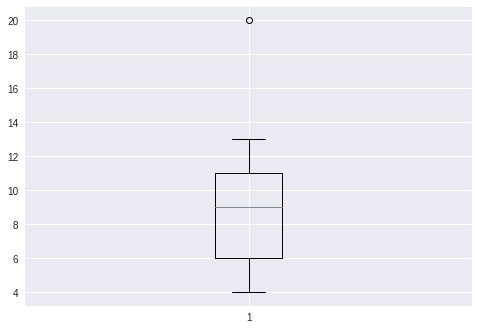

In [147]:
plt.boxplot(df['Tempo Envio']);

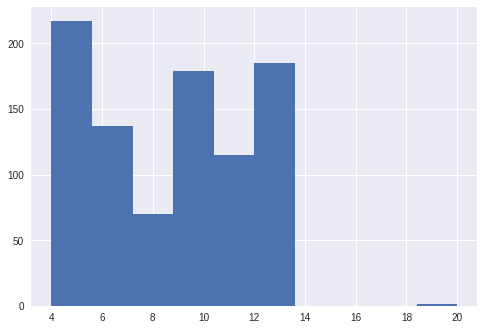

In [148]:
plt.hist(df['Tempo Envio']);

### A análise do tempo de entrega mostra que tem um outlier de 20 dias

In [149]:
df[df['Tempo Envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Tempo Envio,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,20,"2,091.48","2,456.52"


### Salvando a tabela modificada

In [150]:
df.to_excel('vendas_novo.xlsx', index=False)